<a href="https://colab.research.google.com/github/prachi1294/599-Team-1/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import nltk
#nltk.download("gutenberg")
#from nltk.corpus import gutenberg
import requests
import re
from collections import defaultdict
from nltk import clean_html
from collections import Counter
import operator


from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [2]:
nlp = spacy.load('en')
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab


<IPython.core.display.Javascript object>

In [3]:
def read_books(url):
  r = requests.get(url)
  # What comes back includes headers and other HTTP stuff, get just the body of the response
  t = r.text
  return t


#save all the books
the_extra_ordinary_adv_lupin = 'https://www.gutenberg.org/files/6133/6133-0.txt'
arsene_lupin = 'https://www.gutenberg.org/cache/epub/4014/pg4014.txt'
lupin_vs_herlock_sholmes = 'https://www.gutenberg.org/files/40203/40203-0.txt'
the_hollow_needle = 'https://www.gutenberg.org/files/4017/4017-0.txt'
the_confession_of_lupin = 'https://www.gutenberg.org/cache/epub/28093/pg28093.txt'


#read all the books one by one

book1 = read_books(the_extra_ordinary_adv_lupin)
book2 = read_books(arsene_lupin)
book3 = read_books(lupin_vs_herlock_sholmes)
book4 = read_books(the_hollow_needle)
book5 = read_books(the_confession_of_lupin)




<IPython.core.display.Javascript object>

In [4]:
##my regex = (IX|IV|V?I{1,3}\.\s)([A-Z].*)(\W*[a-zA-Z])
## regex for selecting chapter name = (IX|IV|V|V?I{1,3})(\.\s[A-Z].*)
pattern = ("(IX|IV|V|V?I{1,3})(\.\s[A-Z].*)") #get the chapter name. Group 1 will get the chapter no followed by . and space. Group 2 will get chapter name
matches = []
matches = re.findall(pattern, book1)
print(matches)

<IPython.core.display.Javascript object>

[('I', '. The Arrest of ArsÃ¨ne Lupin\r'), ('II', '. ArsÃ¨ne Lupin in Prison\r'), ('III', '. The Escape of ArsÃ¨ne Lupin\r'), ('IV', '. The Mysterious Traveller\r'), ('V', '. The Queenâ\x80\x99s Necklace\r'), ('VI', '. The Seven of Hearts\r'), ('VII', '. Madame Imbertâ\x80\x99s Safe\r'), ('VIII', '. The Black Pearl\r'), ('IX', '. Sherlock Holmes Arrives Too Late\r')]


In [5]:
words_pattern = ("(?!\[?[0-9]+[\[\]]?)[A-Za-z]?[a-z][a-z\']*") #extract words from book and ignores numeric and capital letters
words = []
words = re.findall(words_pattern, book1)
print(words[:10])

<IPython.core.display.Javascript object>

['The', 'Project', 'Gutenberg', 'e', 'Book', 'of', 'The', 'Extraordinary', 'Adventures', 'of']


In [6]:
def sentence_devide(text): ##splitting up book 1 into sentences


  sentence_pattern = ""
  #"....."
  sentence_pattern = "(\\s+\"+[A-Za-z,:;'\"\\s]+[:.?!]\"(?=\\s))"
  #.....
  sentence_pattern = sentence_pattern+"|(\\s+[A-Za-z,:;'\\s]+[.?!](?=\\s))"
  #".....
  sentence_pattern = sentence_pattern+"|(\\s+\"+[A-Za-z,:;'\"\\s]+[:.?!](?=\\s))"
  # ....."
  sentence_pattern = sentence_pattern+"|(\\s+[A-Za-z,:;'\"\\s]+[:.?!]\"(?=\\s))"
  #words_pattern = ('[A-za-z0-9\']+')
  sentences = re.findall(sentence_pattern, book1)
  #print(sentences[:20])
  line_number=0
  sentence_result = []
  for sent in sentences:
    line_number=line_number+1
    print(line_number)
    for s in sent:
      if s:
        sent_sub=re.sub(r'[\r\n]+',' ',s)
        print(sent_sub)
        sentence_result.append(sent_sub)

  return sentence_result


#sentence_1_result = sentence_devide(book1)
#sentence_2_result = sentence_devide(book2)
#sentence_3_result = sentence_devide(book3)
#sentence_4_result = sentence_devide(book4)
#sentence_5_result = sentence_devide(book5)
#print(sentence_5_result)

<IPython.core.display.Javascript object>

In [7]:
from bs4 import BeautifulSoup
nltk.download("stopwords")
# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?','â\x80\x9ci', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '' ]



 # We most likely would like to remove html markup
def cleanHtml (html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    #we need to get rid of this: â\x80\x9ci
    #wn = re.sub('â\x80\x9ci', '\"', w)
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)


def get_word_frequency (text):
    
    # Now clean
    # remove html markup
    t = cleanHtml (text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),20)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        

<IPython.core.display.Javascript object>

In [9]:
##Frequency count from each book

read_text = (book1_text, err1) = get_word_frequency (book1)
(book2_text, err2) =  get_word_frequency (book2)
(book3_text, err3) =  get_word_frequency (book3)
(book4_text, err4) =  get_word_frequency (book4)
(book5_text, err5) =  get_word_frequency (book5)
print(book1_text)
print(book2_text)
print(book3_text)
print(book4_text)
print(book5_text)

<IPython.core.display.Javascript object>

[('day', 64), ('de', 67), ('room', 67), ('work', 70), ('upon', 70), ('us', 71), ('ganimard', 76), ('know', 77), ('mon', 86), ('project', 87), ('time', 91), ('could', 100), ('must', 107), ('man', 125), ('would', 138), ('two', 143), ('said', 210), ('one', 235), ('arsã¨ne', 259), ('lupin', 263)]
[('come', 129), ('dont', 143), ('victoire', 150), ('room', 151), ('well', 168), ('eyes', 172), ('came', 176), ('oh', 187), ('went', 188), ('yes', 201), ('sonia', 215), ('one', 223), ('germaine', 225), ('cried', 236), ('door', 246), ('formery', 254), ('lupin', 327), ('guerchard', 626), ('duke', 735), ('said', 1765)]
[('herlock', 89), ('project', 89), ('could', 95), ('see', 96), ('door', 99), ('mon', 105), ('time', 107), ('man', 113), ('must', 119), ('house', 134), ('would', 137), ('wilson', 139), ('two', 160), ('arsã¨ne', 175), ('ganimard', 183), ('monsieur', 185), ('one', 242), ('said', 286), ('lupin', 370), ('sholmes', 405)]
[('old', 82), ('upon', 83), ('could', 83), ('took', 85), ('project', 88)

<IPython.core.display.Javascript object>

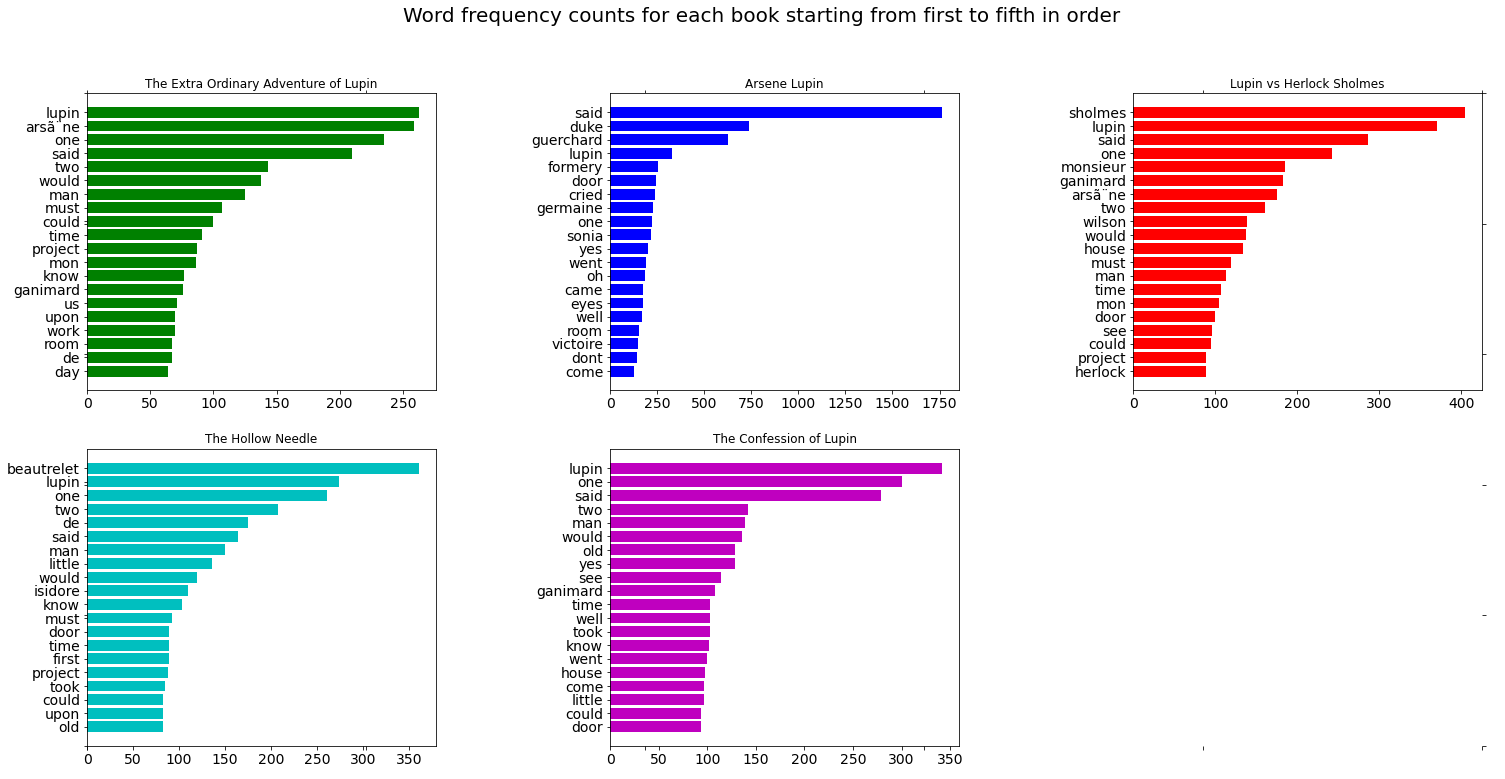

In [10]:
##read_books(arsene_lupin)
#book3 = read_books(lupin_vs_herlock_sholmes)
#book4 = read_books(the_hollow_needle)
#book5 = read_books(the_confession_of_lupin)

%matplotlib inline
def plot_frequency_all (book_1, book_2, book_3, book_4, book_5, title):
    f = plt.figure (figsize=(25, 12))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (231)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(book1_text)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    ax1.title.set_text('The Extra Ordinary Adventure of Lupin')
    pylab .yticks (pos, [ x [0] for x in book1_text ])
    ax1 .barh (range(len(book1_text)), [ x [1] for x in book1_text ], align='center', color='g')

    ax2 = f .add_subplot (232)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    ax2.title.set_text('Arsene Lupin')
    pos = np .arange (len(book2_text)) 
    pylab .yticks (pos, [ x [0] for x in book2_text ])
    ax2 .barh (range (len(book2_text)), [ x [1] for x in book2_text ], align='center', color='b')

    ax3 = f .add_subplot (233)
    ax3 .tick_params (axis='both', which='major', labelsize=14)
    ax3.title.set_text('Lupin vs Herlock Sholmes')
    pos = np .arange (len(book3_text)) 
    pylab .yticks (pos, [ x [0] for x in book3_text ])
    ax3 .barh (range (len(book3_text)), [ x [1] for x in book3_text ], align='center', color='r')

    ax4 = f .add_subplot (234)
    ax4 .tick_params (axis='both', which='major', labelsize=14)
    ax4.title.set_text('The Hollow Needle')
    pos = np .arange (len(book4_text)) 
    pylab .yticks (pos, [ x [0] for x in book4_text ])
    ax4 .barh (range (len(book4_text)), [ x [1] for x in book4_text ], align='center', color='c')

    ax5 = f .add_subplot (235)
    ax5 .tick_params (axis='both', which='major', labelsize=14)
    ax5.title.set_text('The Confession of Lupin')
    pos = np .arange (len(book5_text)) 
    pylab .yticks (pos, [ x [0] for x in book5_text ])
    ax5 .barh (range (len(book5_text)), [ x [1] for x in book5_text ], align='center', color='m')




plot_frequency_all (book1_text, book2_text, book3_text, book4_text, book5_text,'Word frequency counts for each book starting from first to fifth in order')

In [21]:
## find the characters
#find investiagtor name
book_1_characters = ['Ganimard', 'Daspry', 'Devanne','Velmont','Rozaine','Henriette','Floriani','Sherlock Holmes','Louis Lacombe','Baudru','Varin','Valorbe','Mon']
book_2_characters = ['Duke', 'Guerchard', 'Germaine','Sonia','M. Gournay-Martin','Firmin','Dieusy','Jean','Mademoiselle Kritchnoff','Irma','Jacques','Jeanne','Bernard','Marie','M. Charolais','Gournay-Martin']
book_3_characters = ['Wilson', 'Ganimard', 'Gerbois','Englishman','Clotilde','Bresson','Charles','Mlle','Suzanne','Baron','de Crozon']
book_4_characters = ['M. Filleul', 'Ganimard', 'ValmÃ','de Saint','Mlle','Isidore Beautrelet','Massiban','M. de Gesvres','M. Beautrelet']
book_5_characters = ['Ganimard', 'Dugrival', 'Mme','Gabriel','Jeanne','M. Dudouis','Goussot','Angélique','Mlle','Jove','Maître Valandier','Louise','Jeanniot','Farmer Goussot']

find_1_investigator = ['detective','investigating', 'investigator','officer','investigation','detective-service']

def find_detective(book_characters, find_investigator, sentence_result):
  for i in book_characters:
    for n in find_investigator:

      for s in sentence_result:
        match1 = re.search(i, s)
        match2 = re.search(n,s)
        if match1:
          if match2:
            print('\n'+s)
        else:
          continue

  

#book1_detective = find_detective(book_1_characters, find_1_investigator, sentence_1_result) ## Ganimard, Rozaine 
#book2_detective = find_detective(book_2_characters, find_2_investigator, sentence_2_result) ## none
#book3_detective = find_detective(book_3_characters, find_1_investigator, sentence_3_result) ## Ganimard
#book4_detective = find_detective(book_4_characters, find_1_investigator, sentence_4_result) ## Ganimard
#book5_detective = find_detective(book_5_characters, find_1_investigator, sentence_5_result) ## Ganimard


book_name = ['The Extra Ordinary Adventure of Lupin','Arsene Lupin','','Lupin vs Herlock Sholmes','The Hollow Needle','The Confession of Lupin']

#When does the investigator occur for the first time'''

#Questions = ['When does the investigator occur for the first time','When is the crime first mentioned','When is the perpetrator first mentioned','What are the 3 words that occur around the perpetrator on each mention'
#,'When and how the detective/detectives and the perpetrators co-occur','When are other suspects first introduced']
Answers = ['Ganimard', 'Guerchard','M. Dieusy & M. Bonavent',' ','','']
chap = ['Chapter 1','Chapter 10','Chapter 8','Chapter ','Chapter','Chapter']
sent = ['Sentence 26','Sentence 134','Sentence 218','Sentence ','Sentence','Sentence']

df = {'Book Name': book_name, 'investigator': Answers,'Chapter No.': chap,'Sentence No.': sent}
df_dict = pd.DataFrame(df)
df_dict


#rozaine
#Folenfant and Dieuzy two inspectors were assigned to ganimard
#book 2:[4, 131]
 #The Duke set the pendant on the ledge of the bureau, and came down the hall to Sonia.
#book2: [10, 134]
# "Chief-Inspector Guerchard, head of the Detective Department--the Duke of Charmerace."
#book2: [8, 218]
 #He was not wearing a very cheerful air; and he told the Duke that he had found no clue to the perpetrators of the crime, though M. Dieusy and M. Bonavent, the detectives from the Prefecture of Police, had joined him in the search.

<IPython.core.display.Javascript object>

,Book Name,investigator,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,Ganimard,Chapter 1,Sentence 26
1,Arsene Lupin,Guerchard,Chapter 10,Sentence 134
2,,M. Dieusy & M. Bonavent,Chapter 8,Sentence 218
3,Lupin vs Herlock Sholmes,,Chapter,Sentence
4,The Hollow Needle,,Chapter,Sentence
5,The Confession of Lupin,,Chapter,Sentence


In [26]:
#function for crime mentioned

crimes = ['murder','shot', 'crime', 'assault','revolver','robbery','theft','Theft']
#crime_occured = 'occurred'
def crime_mentoned(crimes, sentence_result):

  for c in crimes:
    for s in sentence_result:
      match1 = re.search(c, s)
      #match2 = re.search(crime_occured,s)
      if match1:
        #if match2:
        print('\n'+s)
      else:
        continue

#crime_1= crime_mentoned(crimes, sentence_1_result)
#crime_2= crime_mentoned(crimes, sentence_2_result)
#crime_3= crime_mentoned(crimes, sentence_3_result)
#crime_4= crime_mentoned(crimes, sentence_4_result)
#crime_5= crime_mentoned(crimes, sentence_5_result)


#When is the crime first mentioned'''

book_name = ['The Extra Ordinary Adventure of Lupin','Arsene Lupin', '','','','Lupin vs Herlock Sholmes','The Hollow Needle','The Confession of Lupin']
crime_mentioned = ['Theft', 'burglary','plundered','Theft','stolen','','','']
chap = ['Chapter 1','Chapter 8','Chapter 8','Chapter 9','Chapter 19','Chapter','Chapter','']
sent = ['Sentence 129','Sentence 181','Sentence 110','Sentence 35','Sentence 381','Sentence','Sentence','Sentence']

df_c = {'Book Name': book_name, 'Crime': crime_mentioned,'Chapter No.': chap,'Sentence No.': sent}
df_dict_c = pd.DataFrame(df_c)
df_dict_c


#book 2: [7, 132]
# As he did so, he kept casting fearful glances at the window, as if he feared lest, now that the Duke had gone, the burglars should dash in upon him.
#[8, 110]
#"But the rooms which were to be plundered are upstairs," said the Duke--"the big drawing-rooms on the first floor.
#[8, 181]
#"M. Gournay-Martin particularly asked me to send for Guerchard if I arrived too late, and found the burglary already committed," said the Duke.


#need to search this: Charmerace (used with Duke, I am the Duke of Charmerace)
#[19, 381]
 #"Gentlemen," said the Duke sadly, "the coronet has been stolen."
#book2: 9, 35]
 #"Why, there is the letter from Lupin which my future father-in-law received last night; its arrival was followed by the theft of his two swiftest motor-cars; and then, these signatures on the wall here," said the Duke in some surprise at the question.

<IPython.core.display.Javascript object>

,Book Name,Crime,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,Theft,Chapter 1,Sentence 129
1,Arsene Lupin,burglary,Chapter 8,Sentence 181
2,,plundered,Chapter 8,Sentence 110
3,,Theft,Chapter 9,Sentence 35
4,,stolen,Chapter 19,Sentence 381
5,Lupin vs Herlock Sholmes,,Chapter,Sentence
6,The Hollow Needle,,Chapter,Sentence
7,The Confession of Lupin,,,Sentence


In [14]:
##'When is the perpetrator first mentioned
#chap 1 sent = 17 Lupin

perpetrator_mentioned = ['Lupin', 'Lupin','','','']
chap = ['Chapter 1','Chapter 3','Chapter','Chapter','Chapter']
sent = ['Sentence 17','Sentence 178','Sentence','Sentence','Sentence']

df_p = {'Book Name': book_name, 'Perpetrator Mentioned': perpetrator_mentioned,'Chapter No.': chap,'Sentence No.': sent}
df_dict_p = pd.DataFrame(df_p)
df_dict_p

<IPython.core.display.Javascript object>

,Book Name,Perpetrator Mentioned,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,Lupin,Chapter 1,Sentence 17
1,Arsene Lupin,Lupin,Chapter 3,Sentence 178
2,Lupin vs Herlock Sholmes,,Chapter,Sentence
3,The Hollow Needle,,Chapter,Sentence
4,The Confession of Lupin,,Chapter,Sentence


In [28]:
#When and how the detective/detectives and the perpetrators co-occur - chapter #, the sentence(s) # in a chapter
#Lupin made only a slight movement, and, as suddenly as he had made the attack, Ganimard released his hold
#Chapter 3 sent 398
#veteran detective Mon

book_name1 = ['The Extra Ordinary Adventure of Lupin','Arsene Lupin','Lupin vs Herlock Sholmes','The Hollow Needle','The Confession of Lupin']
co_occur = ['Lupin made only a slight movement, and, as suddenly as he had made the attack, Ganimard released his hold', '"Good-morning, M. Guerchard," said Lupin, with an ambiguous smile and all the air of the Duke of Charmerace','','','']
chap = ['Chapter 3','Chapter 22','Chapter','Chapter','Chapter']
sent = ['Sentence 398','Sentence 152','Sentence','Sentence','Sentence']

df_co = {'Book Name': book_name1, 'Co Occur Details': co_occur,'Chapter No.': chap,'Sentence No.': sent}
df_dict_co = pd.DataFrame(df_co)
df_dict_co


#book2: [22, 152]
# "Good-morning, M. Guerchard," said Lupin, with an ambiguous smile and all the air of the Duke of Charmerace

<IPython.core.display.Javascript object>

,Book Name,Co Occur Details,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,"Lupin made only a slight movement, and, as sud...",Chapter 3,Sentence 398
1,Arsene Lupin,"""Good-morning, M. Guerchard,"" said Lupin, with...",Chapter 22,Sentence 152
2,Lupin vs Herlock Sholmes,,Chapter,Sentence
3,The Hollow Needle,,Chapter,Sentence
4,The Confession of Lupin,,Chapter,Sentence


In [29]:
#When are other suspects first introduced
book_name_sus = ['The Extra Ordinary Adventure of Lupin','','Arsene Lupin','','','Lupin vs Herlock Sholmes','The Hollow Needle','The Confession of Lupin']

suspect_mentioned = ['Varin','Henriette','Mademoiselle Kritchnoff','Duke','','','','']
chap = ['Chapter 6','Chapter 5','Chapter 12','Chapter 21','Chapter','','','']
sent = ['Sentence 246','Sentence 117','Sentence 156','Sentence 281','Sentence','','','']

df_s = {'Book Name': book_name_sus, 'Suspects Mentioned': suspect_mentioned,'Chapter No.': chap,'Sentence No.': sent}
df_dict_s = pd.DataFrame(df_s)
df_dict_s

#book1: Daspry looks like officer
#book1: ring belong to Devannne
#book1: Baudru doesn't look like suspect but read this sentence:  In that event Baudru must have been an accomplice and must have caused his own arrest for the express purpose of taking Lupin's place.


#book2: M. Gournay-Martin is father of Germaine and Duke is fiance of Germaine. Crime happened at M. Gournay-Martin's house
#book2: [3, 171]
 #She drew aside the piece of tapestry, and in the middle of the panel over which the portrait of the Duke had hung he saw written in chalk the words: ARSENE LUPIN "What do you think of that autograph?"
#book2: [5, 211]
# "For once in a way our dear Lupin's fondness for warning people will have given him a painful jar," said the Duke.
#book2: [11, 15]
 #"I have been wondering whether M. Charolais might not have been Arsene Lupin himself," said the Duke.

 #book2: [11, 46]
 #The two of them, as they talked, afforded an interesting contrast: the Duke, with his air of distinction and race, his ironic expression, his mobile features, his clear enunciation and well-modulated voice, his easy carriage of an accomplished fencer--a fencer with muscles of steel--seemed to be a man of another kind from the slow-moving detective, with his husky voice, his common, slurring enunciation, his clumsily moulded features, so ill adapted to the expression of emotion and intelligence.
#[11, 49]
 #Perhaps the most curious thing of all was that, in spite of the fact that he had for so much of his life been an idler, trifling away his time in the pursuit of pleasure, except when he had made his expedition to the South Pole, the Duke gave one the impression of being a cleverer man, of a far finer brain, than the detective who had spent so much of his life sharpening his wits on the more intricate problems of crime.
#[11, 50]
 #When Guerchard came to the end of his questions, the Duke said: "You have given me a very strong feeling that it is going to be a deuce of a job to catch Lupin.
 #book2: [12, 156]
# "Mademoiselle Kritchnoff is quite above suspicion," said the Duke quickly.
#book2 [21, 281]
# "I am the Duke," said Lupin.
#book2: [22, 175]
# "Against Lupin, or against the Duke of Charmerace?"

<IPython.core.display.Javascript object>

,Book Name,Suspects Mentioned,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,Varin,Chapter 6,Sentence 246
1,,Henriette,Chapter 5,Sentence 117
2,Arsene Lupin,Mademoiselle Kritchnoff,Chapter 12,Sentence 156
3,,Duke,Chapter 21,Sentence 281
4,,,Chapter,Sentence
5,Lupin vs Herlock Sholmes,,,
6,The Hollow Needle,,,
7,The Confession of Lupin,,,


In [ ]:
#create word cloud of chacters from each book
from wordcloud import WordCloud
characters_1 = {'Lupin': 233, 'Ganimard': 61, 'Daspry': 39, 'Devanne': 31, 'Velmont': 20, 'Rozaine': 17, 'Henriette': 15, 'Floriani': 15, 'Sherlock Holmes': 14, 'Louis Lacombe': 12, 'Baudru': 11, 'Varin': 38}
characters_2 = {'Lupin': 313,'Duke': 570, 'Guerchard': 541, 'Germaine': 228,'Sonia': 189,'M. Gournay-Martin': 62,'Firmin': 59,'Dieusy': 33,'Jean': 30,'Mademoiselle Kritchnoff': 29,'Irma': 27,'Jacques': 25,'Jeanne': 24,'Bernard': 22,'Marie': 21,'M. Charolais': 20,'Gournay-Martin': 18}
characters_3 = {'Lupin': 346,'Wilson':140, 'Ganimard': 139, 'Gerbois': 61,'Englishman': 46,'Clotilde': 20,'Bresson': 19,'Charles': 16,'Mlle': 15,'Suzanne': 14,'Baron': 11,'de Crozon': 11}
characters_4 = {'Beautrelet': 251,'Lupin': 259,'M. Filleul': 52, 'Ganimard': 64, 'ValmÃ': 35,'de Saint': 34,'Mlle': 33,'Isidore Beautrelet': 27,'Massiban': 27,'M. de Gesvres': 15,'M. Beautrelet': 14} #Beautrelet is organization but included in this character list since so many names are related to this org.
characters_5 = {'Lupin': 343,'Ganimard': 107, 'Dugrival': 32, 'Mme': 32,'Gabriel': 31,'Yvonne': 31,'Jeanne': 27,'M. Dudouis': 23,'Goussot': 22,'Angélique': 18,'Mlle': 16,'Jove': 15,'Maître Valandier': 15,'Louise': 14,'Jeanniot': 13,'Farmer Goussot': 13}


print(characters_1)
print(characters_2)
print(characters_3)
print(characters_4)
print(characters_5)

<IPython.core.display.Javascript object>

{'Lupin': 233, 'Ganimard': 61, 'Daspry': 39, 'Devanne': 31, 'Velmont': 20, 'Rozaine': 17, 'Henriette': 15, 'Floriani': 15, 'Sherlock Holmes': 14, 'Louis Lacombe': 12, 'Baudru': 11, 'Varin': 38}
{'Lupin': 313, 'Duke': 570, 'Guerchard': 541, 'Germaine': 228, 'Sonia': 189, 'M. Gournay-Martin': 62, 'Firmin': 59, 'Dieusy': 33, 'Jean': 30, 'Mademoiselle Kritchnoff': 29, 'Irma': 27, 'Jacques': 25, 'Jeanne': 24, 'Bernard': 22, 'Marie': 21, 'M. Charolais': 20, 'Gournay-Martin': 18}
{'Lupin': 346, 'Wilson': 140, 'Ganimard': 139, 'Gerbois': 61, 'Englishman': 46, 'Clotilde': 20, 'Bresson': 19, 'Charles': 16, 'Mlle': 15, 'Suzanne': 14, 'Baron': 11, 'de Crozon': 11}
{'Beautrelet': 251, 'Lupin': 259, 'M. Filleul': 52, 'Ganimard': 64, 'ValmÃ': 35, 'de Saint': 34, 'Mlle': 33, 'Isidore Beautrelet': 27, 'Massiban': 27, 'M. de Gesvres': 15, 'M. Beautrelet': 14}
{'Lupin': 343, 'Ganimard': 107, 'Dugrival': 32, 'Mme': 32, 'Gabriel': 31, 'Yvonne': 31, 'Jeanne': 27, 'M. Dudouis': 23, 'Goussot': 22, 'Angélique'

In [ ]:
#word cloud function for all main characters in each book

def word_cloud(char, title):
  f = plt.figure (figsize=(10, 10))
  f.suptitle(title, fontsize=20)
  word_cloud = WordCloud(collocations = False,background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(char)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

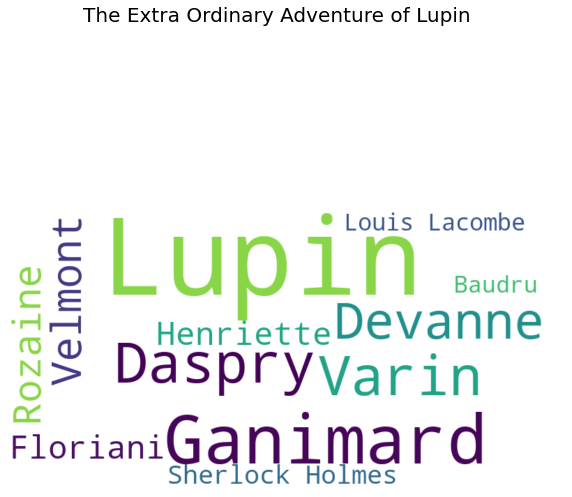

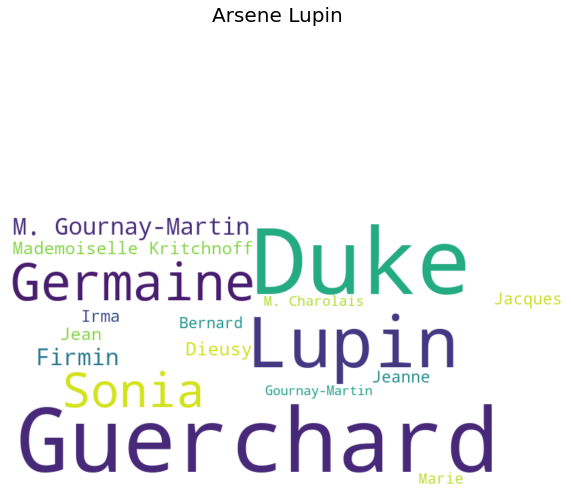

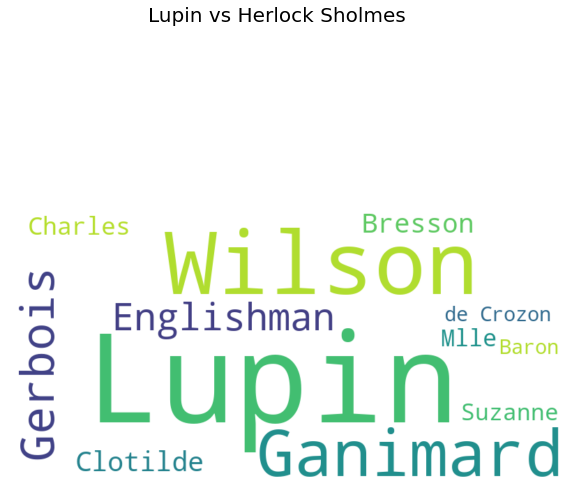

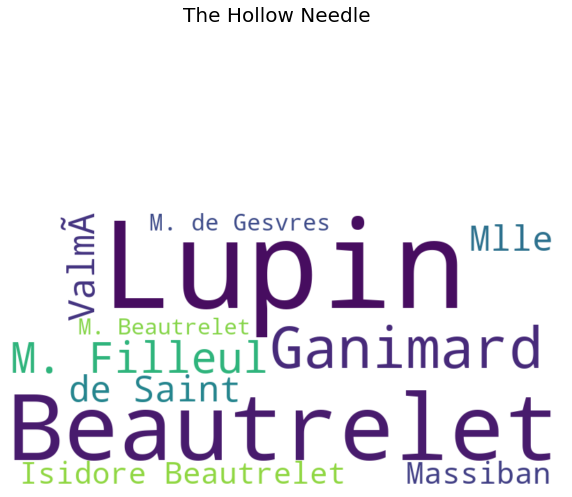

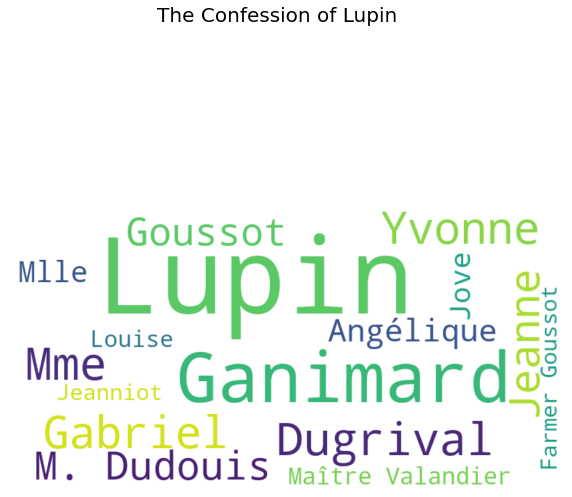

In [ ]:
plot1 = word_cloud(characters_1, 'The Extra Ordinary Adventure of Lupin')
plot2 = word_cloud(characters_2, 'Arsene Lupin')
plot3 = word_cloud(characters_3, 'Lupin vs Herlock Sholmes')
plot4 = word_cloud(characters_4, 'The Hollow Needle')
plot5 = word_cloud(characters_5, 'The Confession of Lupin')


In [ ]:
#find out each character to find more suspects

suspects = ['Daspry', 'Devanne','Velmont','Rozaine','Henriette','Floriani','Sherlock Holmes','Louis Lacombe','Baudru' 'Valorbe','Mon','Varin']
suspect_words = ['suspect','inquiries','inquiry','doubt','strange','pain']

suspect_person = 'Henriette'

for p in suspect_words:
  for sus in suspects:

    for s in sentence_1_result:
      match_sus = re.search(sus, s)
      match2 = re.search(p, s)
      if match_sus:
        if match2:

          print('\n'+s)
        else:
          continue

#suspect 1 is Henriette and she died later and mystery remained unsolved

<IPython.core.display.Javascript object>

NameError: ignored